In [2]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1) Load dataset
wine = load_wine()
X = wine.data

In [4]:
# 2) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 3) Find best K
inertias, sils, Ks = [], [], range(2, 11)
for k in Ks:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(X_scaled, labels))

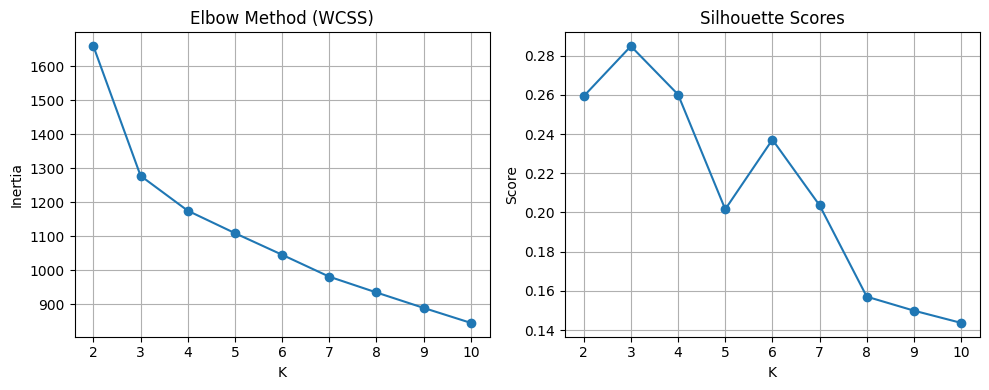

In [6]:
# 4) Plot Elbow & Silhouette curves
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Ks, inertias, marker="o")
plt.title("Elbow Method (WCSS)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(Ks, sils, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("K")
plt.ylabel("Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# 5) Pick best K (highest silhouette score)
best_k = Ks[np.argmax(sils)]
print(f"Best K: {best_k} (Silhouette Score = {max(sils):.3f})")

Best K: 3 (Silhouette Score = 0.285)


In [8]:
# 6) Fit final KMeans
kmeans = KMeans(n_clusters=best_k, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

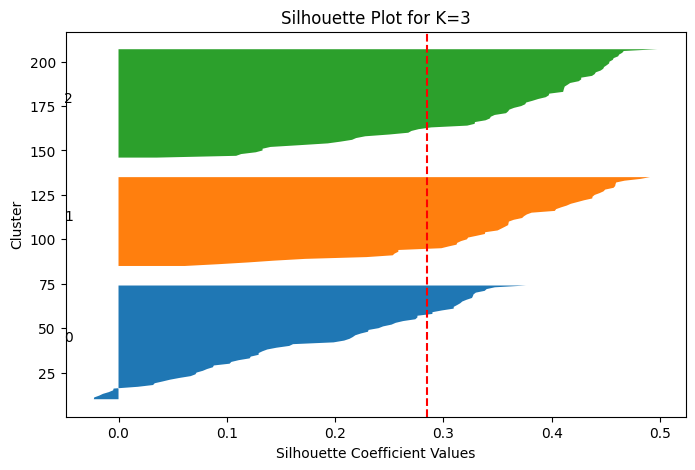

In [9]:
# 7) Silhouette plot for chosen K
silhouette_vals = silhouette_samples(X_scaled, labels)
y_lower = 10
plt.figure(figsize=(8, 5))

for i in range(best_k):
    cluster_sil_vals = silhouette_vals[labels == i]
    cluster_sil_vals.sort()
    y_upper = y_lower + len(cluster_sil_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_sil_vals), str(i))
    y_lower = y_upper + 10

plt.axvline(silhouette_score(X_scaled, labels), color="red", linestyle="--")
plt.title(f"Silhouette Plot for K={best_k}")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.show()